# Data Analysis for Households Expenditure Based on Tenure
 
## Librabries used

In [1]:
#List of imports and librabaries used

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Import CSV

In [2]:
#Import csv

A32 = pd.read_csv('A32-Household expenditure by tenure.csv')

A32

,Expenditure_Category,Tenure,Year,Expenditure
0,Food and non-alcoholic drinks,Owners owned outright,2016,57.0
1,Food and non-alcoholic drinks,Owners buying with a mortage,2016,68.1
2,Food and non-alcoholic drinks,Social rented from council,2016,43.1
3,Food and non-alcoholic drinks,Social rented from registered social landlord,2016,49.2
4,Food and non-alcoholic drinks,Rent free,2016,48.8
...,...,...,...,...
450,Other expenditure items,Social rented from council,2020,24.2
451,Other expenditure items,Social rented from registered social landlord,2020,25.6
452,Other expenditure items,Rent free,2020,62.4
453,Other expenditure items,Rent paid and unfurnished,2020,52.3


## Preprocessing

In [3]:
#Preprocessing the data

A32 = A32.replace(['Food and non-alcoholic drinks','Alcoholic drinks, tobacco and narcotics','Clothing and footwear','Housing(net) fuel and power','Household goods and services','Health','Transport','Communication','Recreation and culture','Education','Restaurants and hotels','Miscellaneous goods and services','Other expenditure items'], [1,2,3,4,5,6,7,8,9,10,11,12,13])

A32 = A32.replace(['Owners owned outright','Owners buying with a mortage','Social rented from council','Social rented from registered social landlord','Rent free','Rent paid and unfurnished','Rent paid and furnished'],[1,2,3,4,5,6,7])

print(A32.info())
print(A32.describe())

A32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expenditure_Category  455 non-null    int64  
 1   Tenure                455 non-null    int64  
 2   Year                  455 non-null    int64  
 3   Expenditure           455 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.3 KB
None
       Expenditure_Category      Tenure        Year  Expenditure
count            455.000000  455.000000   455.00000   455.000000
mean               7.000000    4.000000  2018.00000    38.746813
std                3.745776    2.002201     1.41577    37.437105
min                1.000000    1.000000  2016.00000     0.200000
25%                4.000000    2.000000  2017.00000    14.100000
50%                7.000000    4.000000  2018.00000    28.000000
75%               10.000000    6.000000  2019.00000    51.300000
max           

,Expenditure_Category,Tenure,Year,Expenditure
0,1,1,2016,57.0
1,1,2,2016,68.1
2,1,3,2016,43.1
3,1,4,2016,49.2
4,1,5,2016,48.8
...,...,...,...,...
450,13,3,2020,24.2
451,13,4,2020,25.6
452,13,5,2020,62.4
453,13,6,2020,52.3


In [4]:
#Check the data frame values
print(A32['Expenditure_Category'].unique())
print(A32['Tenure'].unique())
print(A32['Year'].unique())
print(A32['Expenditure'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4 5 6 7]
[2016 2017 2018 2019 2020]
[5.700e+01 6.810e+01 4.310e+01 4.920e+01 4.880e+01 4.990e+01 4.250e+01
 5.780e+01 6.830e+01 4.430e+01 4.600e+01 5.330e+01 4.660e+01 5.970e+01
 7.240e+01 4.530e+01 4.740e+01 5.910e+01 5.750e+01 5.480e+01 6.130e+01
 7.440e+01 4.900e+01 5.440e+01 5.770e+01 6.250e+01 7.620e+01 5.280e+01
 4.820e+01 5.590e+01 5.690e+01 5.600e+01 1.140e+01 1.320e+01 9.900e+00
 9.700e+00 9.500e+00 1.070e+01 6.000e+00 1.100e+01 1.370e+01 9.800e+00
 1.330e+01 7.600e+00 1.180e+01 8.300e+00 1.240e+01 1.390e+01 1.120e+01
 1.080e+01 1.010e+01 1.220e+01 1.290e+01 1.430e+01 1.310e+01 1.200e+01
 1.060e+01 1.110e+01 1.230e+01 1.270e+01 1.530e+01 1.170e+01 2.090e+01
 3.350e+01 1.260e+01 1.770e+01 1.510e+01 1.980e+01 2.070e+01 2.270e+01
 3.520e+01 1.410e+01 1.300e+01 1.650e+01 2.350e+01 2.110e+01 3.550e+01
 1.360e+01 1.680e+01 1.610e+01 2.080e+01 2.720e+01 2.230e+01 3.400e+01
 1.730e+01 1.420e+01 3.540e+01 1.820e+01 2.540e+01 2.040e+01 1.4

## Split into smaller dataframe

In [7]:
#Split the dataframe by years

A32_2016=A32[A32['Year'] == 2016]
A32_2017=A32[A32['Year'] == 2017]
A32_2018=A32[A32['Year'] == 2018]
A32_2019=A32[A32['Year'] == 2019]
A32_2020=A32[A32['Year'] == 2020]

In [8]:
#Split the dataframe by expenditure category

A32_EC1=A32[A32['Expenditure_Category'] == 1]
A32_EC2=A32[A32['Expenditure_Category'] == 2]
A32_EC3=A32[A32['Expenditure_Category'] == 3]
A32_EC4=A32[A32['Expenditure_Category'] == 4]
A32_EC5=A32[A32['Expenditure_Category'] == 5]
A32_EC6=A32[A32['Expenditure_Category'] == 6]
A32_EC7=A32[A32['Expenditure_Category'] == 7]
A32_EC8=A32[A32['Expenditure_Category'] == 8]
A32_EC9=A32[A32['Expenditure_Category'] == 9]
A32_EC10=A32[A32['Expenditure_Category'] == 10]
A32_EC11=A32[A32['Expenditure_Category'] == 11]
A32_EC12=A32[A32['Expenditure_Category'] == 12]
A32_EC13=A32[A32['Expenditure_Category'] == 13]

In [9]:
#Split the dataframe by tenure

A32_T1=A32[A32['Tenure'] == 1]
A32_T2=A32[A32['Tenure'] == 2]
A32_T3=A32[A32['Tenure'] == 3]
A32_T4=A32[A32['Tenure'] == 4]
A32_T5=A32[A32['Tenure'] == 5]
A32_T6=A32[A32['Tenure'] == 6]
A32_T7=A32[A32['Tenure'] == 7]

## Check Outliers

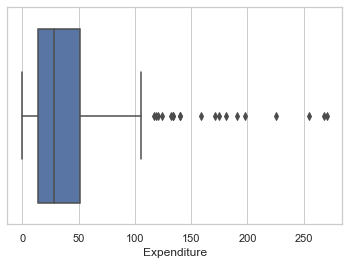

In [10]:
#Boxplot to see is there any outlier 

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=A32["Expenditure"])

#Presence of outlier found

## Overall Visualisation

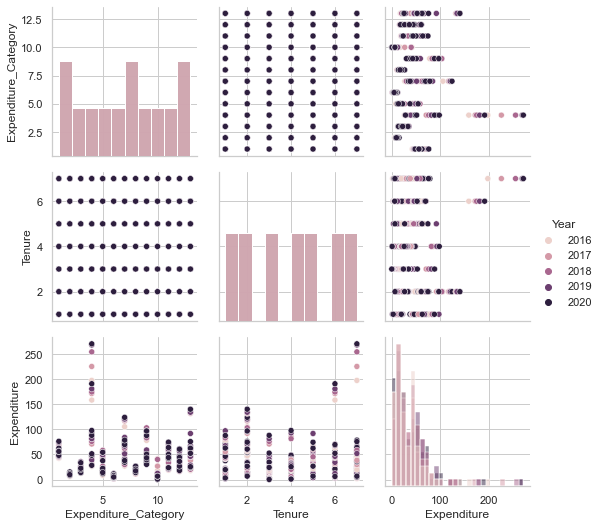

In [11]:
#Get the overall scatterplot visualisation

g = sns.PairGrid(A32, hue="Year")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Year", adjust_subtitles=True)

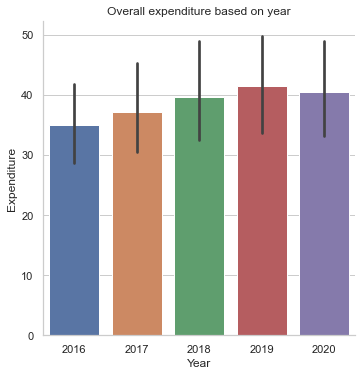

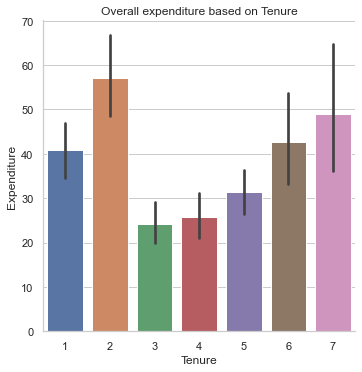

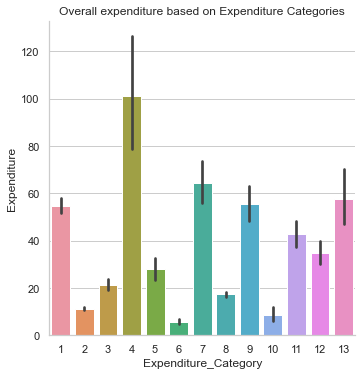

In [12]:
#Overall expenditure based on Year, Tenure and Expenditure Categories

sns.catplot(x="Year", y="Expenditure", data=A32, kind="bar").set(title="Overall expenditure based on year")

sns.catplot(x="Tenure", y="Expenditure", data=A32, kind="bar").set(title="Overall expenditure based on Tenure")

sns.catplot(x="Expenditure_Category", y="Expenditure", data=A32, kind="bar").set(title="Overall expenditure based on Expenditure Categories")


## Visualisation based on Expenditure Category

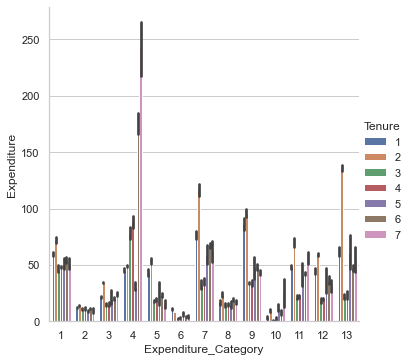

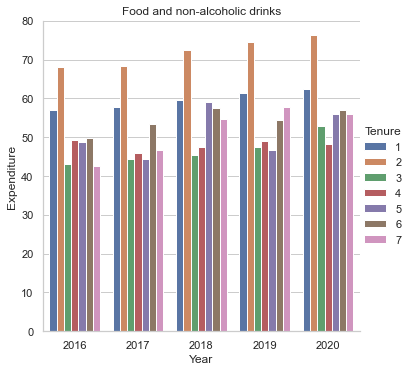

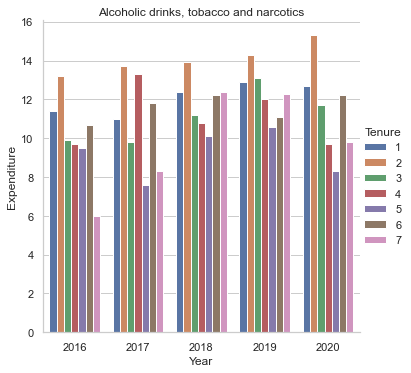

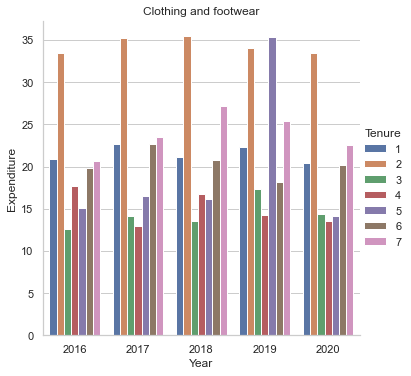

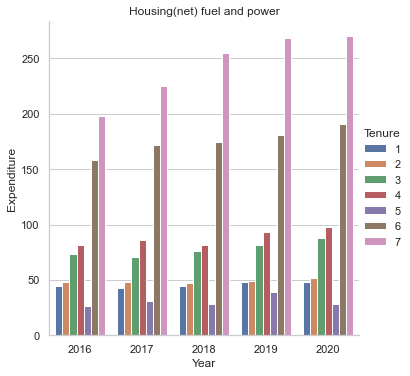

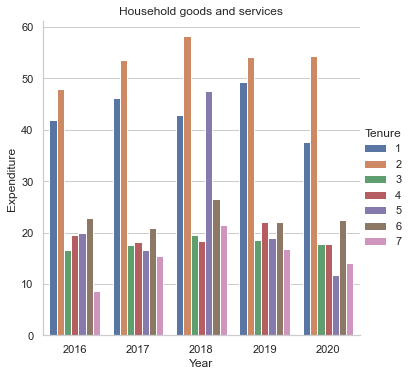

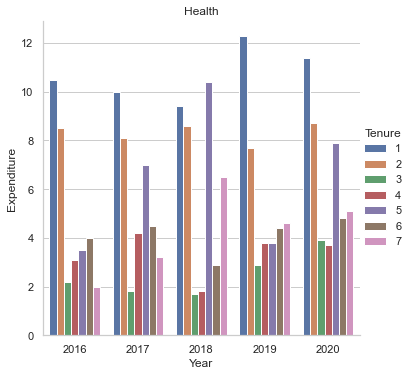

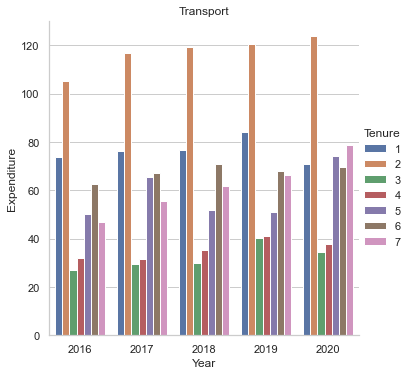

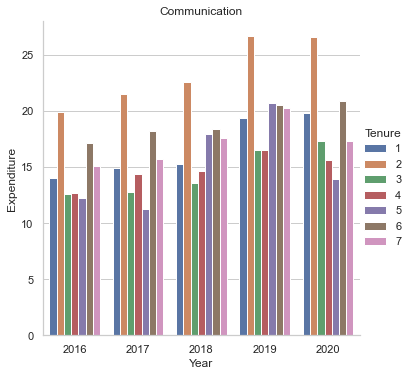

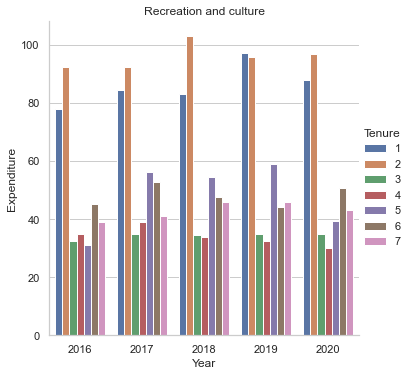

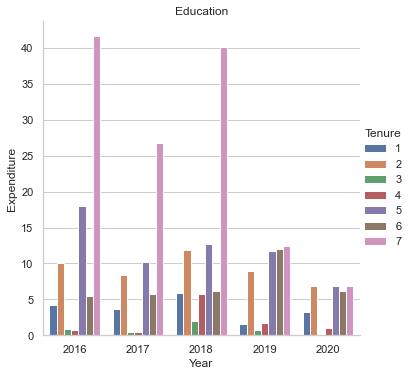

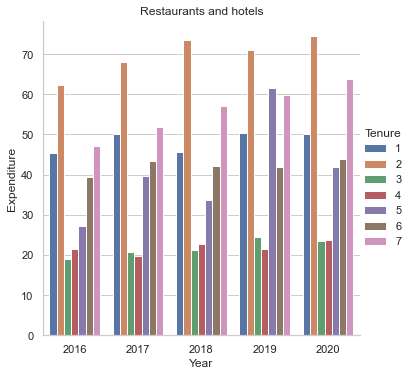

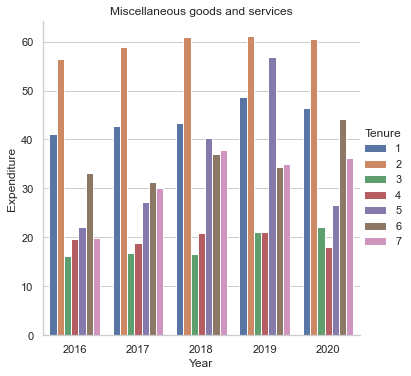

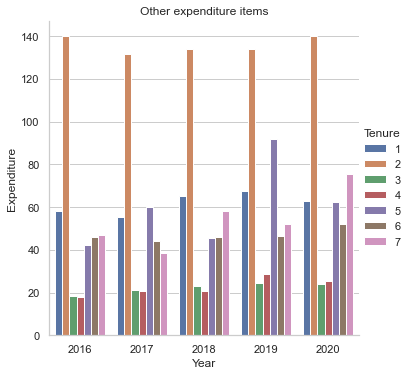

In [13]:
#Detailed Bar Charts based on expenditure category

sns.catplot(x="Expenditure_Category", y="Expenditure", hue="Tenure", data=A32, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC1, kind="bar").set(title='Food and non-alcoholic drinks')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC2, kind="bar").set(title='Alcoholic drinks, tobacco and narcotics')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC3, kind="bar").set(title='Clothing and footwear')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC4, kind="bar").set(title='Housing(net) fuel and power')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC5, kind="bar").set(title='Household goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC6, kind="bar").set(title='Health')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC7, kind="bar").set(title='Transport')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC8, kind="bar").set(title='Communication')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC9, kind="bar").set(title='Recreation and culture')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC10, kind="bar").set(title='Education')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC11, kind="bar").set(title='Restaurants and hotels')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC12, kind="bar").set(title='Miscellaneous goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Tenure", data=A32_EC13, kind="bar").set(title='Other expenditure items')


Expenditure_Category         1          2          3           4          5   \
Year                                                                           
2016                  51.228571  10.057143  20.042857   90.071429  25.357143   
2016                  51.228571  10.057143  20.042857   90.071429  25.357143   
2016                  51.228571  10.057143  20.042857   90.071429  25.357143   
2016                  51.228571  10.057143  20.042857   90.071429  25.357143   
2016                  51.228571  10.057143  20.042857   90.071429  25.357143   
...                         ...        ...        ...         ...        ...   
2020                  58.357143  11.385714  19.814286  110.771429  25.114286   
2020                  58.357143  11.385714  19.814286  110.771429  25.114286   
2020                  58.357143  11.385714  19.814286  110.771429  25.114286   
2020                  58.357143  11.385714  19.814286  110.771429  25.114286   
2020                  58.357143  11.3857

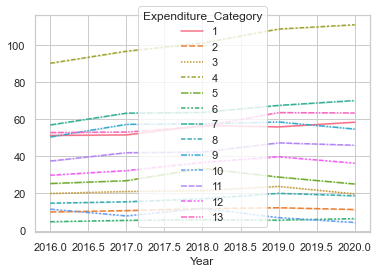

In [14]:
#Get the line chart based on Expenditure Category

order = A32['Year']
A32_wide = A32.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A32_wide = A32_wide.reindex(order, axis=0)

print(A32_wide)
sns.lineplot(data=A32_wide)
plt.show()

## Visualisation based on year

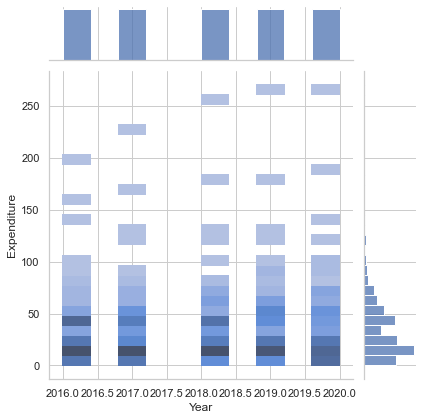

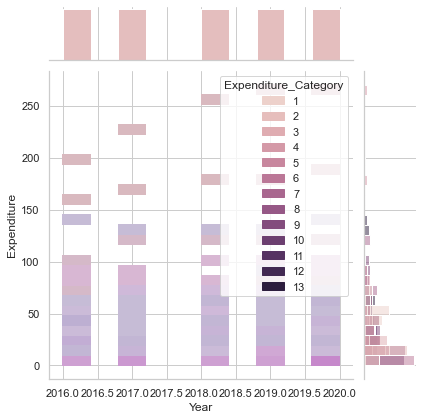

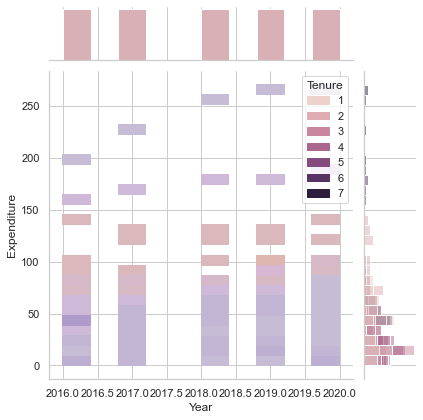

In [15]:
#Show the joint charts based on Year

sns.jointplot(x="Year", y="Expenditure", data=A32, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Tenure", data=A32, kind="hist")

<AxesSubplot:title={'center':'Year 2020'}, ylabel='Expenditure'>

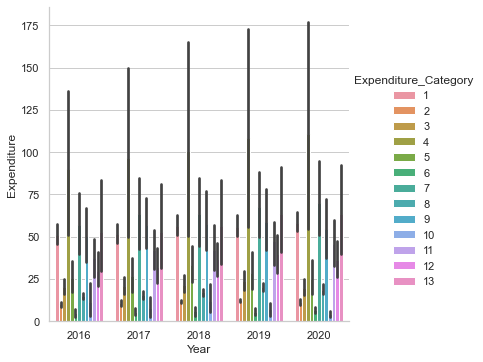

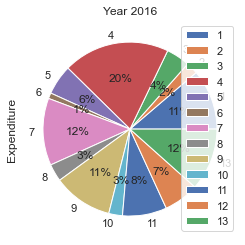

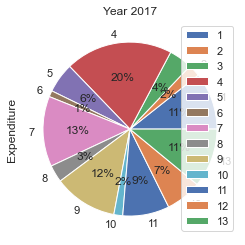

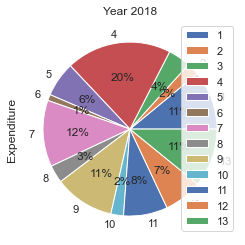

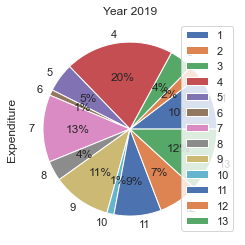

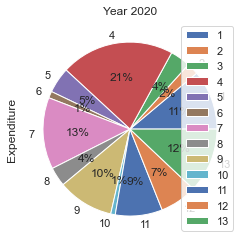

In [16]:
#Detailed Bar Charts based on years

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32, kind="bar")

A32_2016.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2016")

A32_2017.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2017")

A32_2018.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2018")

A32_2019.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2019")

A32_2020.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2020")

## Visualisation based on Tenure

Tenure          1          2          3          4          5          6  \
Year                                                                       
2016    38.561538  54.323077  21.876923  24.684615  25.069231  39.576923   
2016    38.561538  54.323077  21.876923  24.684615  25.069231  39.576923   
2016    38.561538  54.323077  21.876923  24.684615  25.069231  39.576923   
2016    38.561538  54.323077  21.876923  24.684615  25.069231  39.576923   
2016    38.561538  54.323077  21.876923  24.684615  25.069231  39.576923   
...           ...        ...        ...        ...        ...        ...   
2020    41.076923  59.169231  26.561538  26.369231  30.123077  45.784615   
2020    41.076923  59.169231  26.561538  26.369231  30.123077  45.784615   
2020    41.076923  59.169231  26.561538  26.369231  30.123077  45.784615   
2020    41.076923  59.169231  26.561538  26.369231  30.123077  45.784615   
2020    41.076923  59.169231  26.561538  26.369231  30.123077  45.784615   

Tenure     

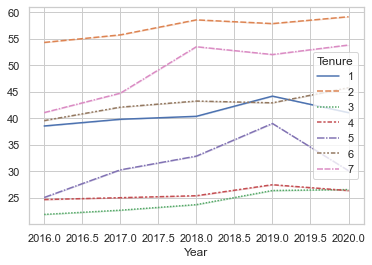

In [17]:
#Get the line chart based on Tenure

order = A32['Year']
A32_wide = A32.pivot_table(index='Year', columns='Tenure', values='Expenditure')
A32_wide = A32_wide.reindex(order, axis=0)

print(A32_wide)
sns.lineplot(data=A32_wide)
plt.show()

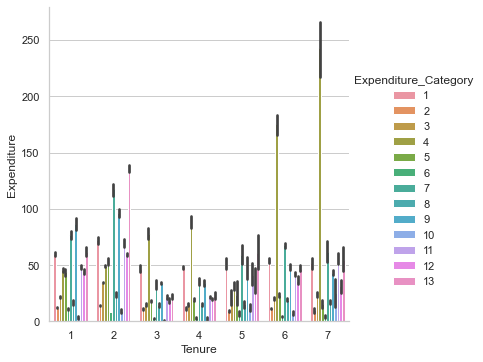

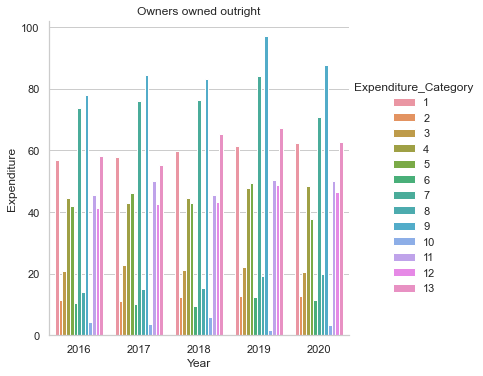

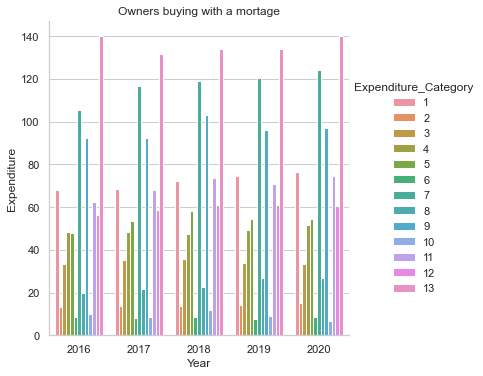

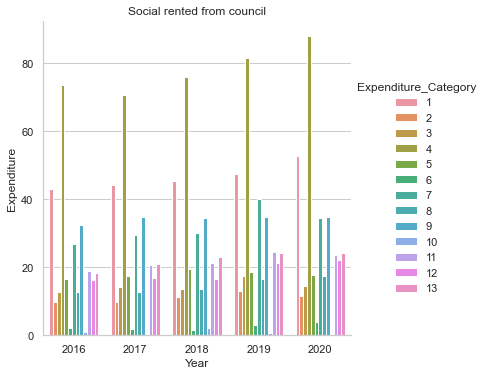

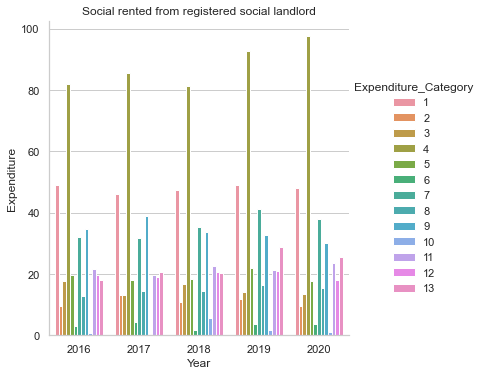

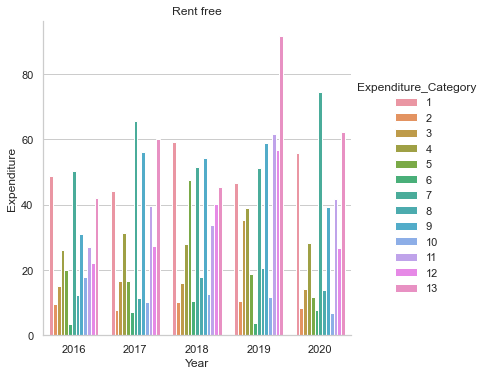

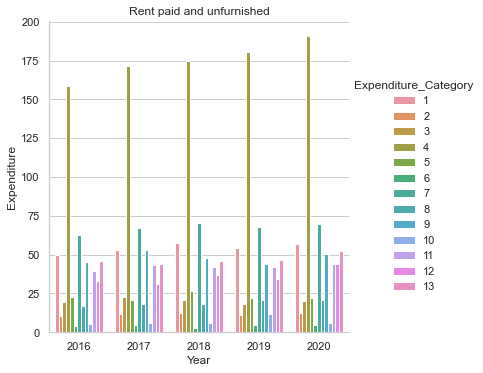

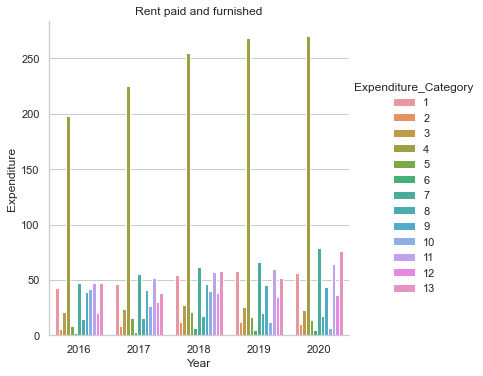

In [18]:
#Detailed Bar Charts based on Tenure

sns.catplot(x="Tenure", y="Expenditure", hue="Expenditure_Category", data=A32, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T1, kind="bar").set(title='Owners owned outright')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T2, kind="bar").set(title='Owners buying with a mortage')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T3, kind="bar").set(title='Social rented from council')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T4, kind="bar").set(title='Social rented from registered social landlord')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T5, kind="bar").set(title='Rent free')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T6, kind="bar").set(title='Rent paid and unfurnished')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A32_T7, kind="bar").set(title='Rent paid and furnished')
